### 분석준비

In [2]:
# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')


# 모든 열 다 보기
pd.set_option('display.max_columns',None)

# plotly 그리기
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import chart_studio
from chart_studio.plotly import plot, iplot
chart_studio.tools.set_credentials_file(username='ghktkf7788', api_key='D9ASyMzNm4ltyTqLQ8CH')

# 그래프 한글표기
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 디비 연결
import psycopg2
import json

def rds_python_conn():
    # rds와 python 연동을 위한 정보 입력
    with open('postgres.info.json','r') as json_file:
        db_info = json.load(json_file)

    host = db_info.get('host')
    dbname = 'postgres' 
    user = 'postgres' 
    password = db_info.get('password')
    port = 5432

    connection = psycopg2.connect(host=host,
                                  dbname=dbname ,
                                  user=user ,
                                  password=password ,
                                  port=port)
    return connection

### 유입경로별 체결 건수와 비율

In [70]:
SQL = """
SELECT *
FROM mql m full outer join closed_deals j on m.mql_id=j.mql_id
;
"""
mql = pd.read_sql(SQL, rds_python_conn())

# 체결 날짜의 연도-월 컬럼 생성
mql['won_date_new'] = pd.to_datetime(mql['won_date']).dt.strftime('%Y-%m')
# 컨택한 날짜의 연도-월 컬럼 생성
mql['first_contact_date_new'] = pd.to_datetime(mql['first_contact_date']).dt.strftime('%Y-%m')

In [8]:
SQL = """
SELECT *
FROM mql m full outer join closed_deals j on m.mql_id=j.mql_id
;
"""
mql = pd.read_sql(SQL, rds_python_conn())
mql

,mql_id,first_contact_date,landing_page_id,origin,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,5143,2018-02-01,490,social,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
1,5819,2017-10-20,247,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
2,1369,2018-03-22,95,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
3,312,2018-01-22,435,email,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
4,3690,2018-02-21,119,organic_search,3690.0,2187.0,17.0,2.0,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2920,2018-05-22,300,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7996,3895,2018-03-27,269,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7997,7527,2017-08-27,119,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7998,639,2017-10-06,489,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN


In [186]:
won_counts = mql.groupby('origin')['seller_id'].count().sort_values(ascending=False).reset_index()
won_percentages = round(won_counts['seller_id'] / won_counts['seller_id'].sum() * 100, 1)

# make_subplots를 사용하여 서로 다른 유형의 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 그래프 추가 (막대 그래프)
fig.add_trace(
    go.Bar(
        x=won_counts['origin'],
        y=won_counts['seller_id'],
        name='체결 건수',
        marker_color='#A0BFE0'  # 막대 그래프 색상 지정
    ),
    secondary_y=False
)

# 두 번째 그래프 추가 (라인 플롯)
fig.add_trace(
    go.Scatter(
        x=won_counts['origin'],
        y=won_percentages,
        name='체결 비율',
        mode='lines+markers',
        line=dict(color='#4A55A2'),  # 라인 플롯 색상 지정
        marker=dict(color='#4A55A2')
    ),
    secondary_y=True
)

# 레이아웃 설정
fig.update_layout(
    title='유입경로별 체결 건수와 비율',  # 전체 그래프의 제목
    yaxis=dict(title='체결 건수'),
    yaxis2=dict(title='체결 비율 (%)', overlaying='y', side='right'),
    legend=dict(),
    width=800
)

fig.show()



### 유입경로별 체결 건수

In [187]:
won_counts = mql.groupby('origin')['seller_id'].count().sort_values(ascending=False).reset_index()

# make_subplots를 사용하여 서로 다른 유형의 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 그래프 추가 (막대 그래프)
fig.add_trace(
    go.Bar(
        x=won_counts['origin'],
        y=won_counts['seller_id'],
        name='체결 건수',
        marker_color='#4A55A2'  # 막대 그래프 색상 지정
    ),
    secondary_y=False
)

# 레이아웃 설정
fig.update_layout(
    title='유입경로별 체결 건수',  # 전체 그래프의 제목
    xaxis=dict(title='유입경로'),
    yaxis=dict(title='체결 건수'),
    legend=dict(),
    width=900
)

fig.show()

#plot(fig, filename = '유입경로별 체결 건수', auto_open=True)

'https://plotly.com/~ghktkf7788/4/'

### 유입경로별 체결 비율

In [188]:
won_percentages = round(won_counts['seller_id'] / won_counts['seller_id'].sum() * 100, 1)

color = ['#4A55A2','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3','#BAC3F3']
fig = px.pie(values=won_percentages, names=won_counts['origin'])

fig.update_layout(
    title={
        'text': '유입경로별 체결 비율',  # 제목 텍스트
        'x': 0.5,  # x축 위치를 중앙으로 설정
        'xanchor': 'center',  # x축 위치의 기준을 중앙으로 설정
        'y': 0.95,  # y축 위치를 설정 (0~1 범위, 상단으로 갈수록 작은 값)
        'yanchor': 'top'  # y축 위치의 기준을 상단으로 설정
    },
    legend=dict(),
    width=450
)
fig.update_traces(pull=[0.1, 0, 0, 0],marker_colors=color)

fig.show()
#plot(fig, filename = '유입경로별 체결 비율', auto_open=True)


### 유입경로별 체결,미체결된 잠재고객 비율과 효과

In [189]:
a = (mql.groupby('origin').size()/mql.shape[0]*100).reset_index(name='mql')
b = (mql[mql['won_date'].notnull()]['origin'].value_counts(normalize=True)*100).reset_index(name='closed_deals')
ab = a.merge(b, on='origin')
ab['difference'] = ab['closed_deals'] - ab['mql']
custom_order = ['paid_search', 'display', 'social', 'email', 'referral','direct_traffic','organic_search','other','other_publicities','unknown']  # 원하는 순서대로 유입경로를 나열
ab = ab.set_index('origin').reindex(custom_order).reset_index()

# make_subplots를 사용하여 서로 다른 유형의 그래프 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 그래프 추가 (라인 플롯)
fig.add_trace(
    go.Bar(
        x=ab['origin'],
        y=ab['mql'],
        name='잠재고객비율',
        marker_color='#A0BFE0'  # 막대 그래프 색상 지정
    ),
    secondary_y=False
)

# 두 번째 그래프 추가 (라인 플롯)
fig.add_trace(
    go.Bar(
        x=ab['origin'],
        y=ab['closed_deals'],
        name='체결된 잠재고객비율',
        marker_color='#7895CB'
    )
)
# 세 번째 그래프 추가 (라인 플롯)
fig.add_trace(
    go.Scatter(
        x=ab['origin'],
        y=ab['difference'],
        name='유입경로별 효과',
        mode='lines+markers',
        line=dict(color='#4A55A2'),  # 라인 플롯 색상 지정
        marker=dict(color='#4A55A2')
    )
)

# 레이아웃 설정
fig.update_layout(
      title=('유입경로별 체결,미체결된 잠재고객 비율과 효과'), # 전체 그래프의 제목
    yaxis=dict(title='비율'),
    legend=dict(),
    width=800
)

fig.show()
#plot(fig, filename = '유입경로별 체결,미체결된 잠재고객 비율과 효과', auto_open=True)

### 유입경로별 효과(체결된잠재고객비율-잠재고객비율)

In [190]:
a = (mql.groupby('origin').size() / mql.shape[0] * 100).reset_index(name='mql')
b = (mql[mql['won_date'].notnull()]['origin'].value_counts(normalize=True) * 100).reset_index(name='closed_deals')
ab = a.merge(b, on='origin')
ab['difference'] = ab['closed_deals'] - ab['mql']
ab=ab.sort_values(by='difference',ascending=False)

# 첫 번째 그래프 추가 (막대 그래프)
fig = go.Figure(data=[go.Bar(
    x=ab['origin'],
    y=ab['difference'],
    marker_color='#4A55A2'  # 모든 막대의 색상을 #4A55A2로 설정
)])

# 레이아웃 설정
fig.update_layout(
    title='유입경로별 효과(체결된잠재고객비율-잠재고객비율)',  # 전체 그래프의 제목
    yaxis=dict(title='비율'),
    legend=dict(),
    width=500
)

fig.show()
#plot(fig, filename = '유입경로별 효과(체결된잠재고객비율-잠재고객비율)', auto_open=True)

### 매출(객단가)

In [8]:
# ('delivered','shipped','invoiced','processing') 이경우만 가지고 파악.
SQL = """
SELECT *
FROM "order"
WHERE order_status in ('delivered','shipped','invoiced','processing') and order_purchase_timestamp < '2018-09-01'
order by order_id
"""
order = pd.read_sql(SQL, rds_python_conn())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22
...,...,...,...,...,...,...,...,...
98194,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22
98195,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04
98196,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21
98197,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21


In [9]:
SQL = """
SELECT customer_id, customer_unique_id
FROM customers
"""

uniqueid = pd.read_sql(SQL, rds_python_conn())

#order와 uniqueid merge
order_uniqueid = order.merge(uniqueid,on='customer_id',how='left')
order_uniqueid

,customer_id,customer_unique_id
0,93596,86343
1,96387,55527
2,71593,44820
3,17589,36016
4,46972,96049
...,...,...
99436,40421,29126
99437,65930,3710
99438,83443,38830
99439,52687,79036


In [12]:
# ('delivered','shipped','invoiced','processing') 이경우만 가지고 파악.
SQL = """
SELECT *
FROM "order" o join payments p on o.order_id=p.order_Id 
WHERE order_status in ('delivered','shipped','invoiced','processing') and order_purchase_timestamp < '2018-09-01'
order by o.order_id
"""

orderpayment = pd.read_sql(SQL, rds_python_conn())
orderpayment = orderpayment.loc[:, ~orderpayment.columns.duplicated()]
orderpayment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24,1,credit_card,2,104.87
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31,1,credit_card,3,126.54
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04,1,credit_card,8,279.11
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11,1,credit_card,7,73.64
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22,1,credit_card,2,24.68
...,...,...,...,...,...,...,...,...,...,...,...,...
102560,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22,1,credit_card,10,1057.88
102561,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04,1,credit_card,1,264.66
102562,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21,1,credit_card,1,27.77
102563,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21,1,credit_card,1,61.05


In [13]:
# 객단가
# 가설 1 : 매출이 감소한건 객단가가 감소했기 때문이다.
# 전체기간기준
# print(orderpayment['payment_value'].sum())
# orderpayment['payment_value'].sum()/orderpayment.shape[0]

15738041.370000001


153.44456071759373

In [14]:
# (orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum()/orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['order_id'].size()).plot(label='연도-월별 객단가')
# plt.axhline(y=orderpayment['payment_value'].sum()/orderpayment.shape[0], color='gray', linestyle='--', label='전체객단가평균')
# plt.title('2018년-월별 객단가')
# plt.xlabel('연도-월')
# plt.ylabel('객단가')

# plt.legend()


### 연도-월별 고객의 주문 건수

In [15]:
a = order_uniqueid.groupby(pd.to_datetime(order_uniqueid['order_purchase_timestamp']).dt.strftime('%Y-%m'))['customer_unique_id'].size().reset_index()

# 첫 번째 그래프 추가 (라인 플롯)
fig = px.line(
        x=a['order_purchase_timestamp'],
        y=a['customer_unique_id'],
    )

# 라인 스타일과 색상 설정
fig.update_traces(
    line=dict(color='#4A55A2', dash='solid'),  # 선 스타일과 색상 설정
    marker=dict(color='#4A55A2'),  # 마커 색상 설정
)

# 레이아웃 설정
fig.update_layout(
    {
        "title" : {
            "text" : "<b>연도-월별 고객의 주문 건수</b>",
            "x" : 0.5,
            "y" : 0.9,
            "font" : {"size":15}
        }
    },  # 전체 그래프의 제목
    xaxis=dict(title='날짜'),  # x축 레이블 설정
    yaxis=dict(title='주문 건수'),
    legend=dict()
)

fig.show()
#plot(fig, filename = '연도-월별 고객의 주문 건수', auto_open=True)



NameError: name 'chart_studio' is not defined

### 연도-월별 매출

In [200]:
a = orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum().reset_index()

# 첫 번째 그래프 추가 (라인 플롯)
fig = px.line(
        x=a['order_purchase_timestamp'],
        y=a['payment_value'],
    )

# 라인 스타일과 색상 설정
fig.update_traces(
    line=dict(color='#4A55A2', dash='solid'),  # 선 스타일과 색상 설정
    marker=dict(color='#4A55A2'),  # 마커 색상 설정
)

# 레이아웃 설정
fig.update_layout(
    {
        "title" : {
            "text" : "<b>연도-월별 매출</b>",
            "x" : 0.5,
            "y" : 0.9,
            "font" : {"size":15}
        }
    },  # 전체 그래프의 제목
    xaxis=dict(title='날짜'),  # x축 레이블 설정
    yaxis=dict(title='매출'),
    legend=dict()
)

fig.show()
#plot(fig, filename = '연도-월별 매출', auto_open=True)

### 월별 매출 증가율

In [16]:
SQL = """
SELECT *
FROM "order" o join payments p on o.order_id=p.order_Id 
WHERE order_status in ('delivered','shipped','invoiced','processing') and order_purchase_timestamp < '2018-09-01'
order by o.order_id
"""

orderpayment = pd.read_sql(SQL, rds_python_conn())
orderpayment = orderpayment.loc[:, ~orderpayment.columns.duplicated()]

# 매출 증가율 구하기
lis = []
name=[]
a = orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum()
for i in range(len(a)-1):
    lis.append(round((a[i+1]-a[i])/a[i]*100,1))
    name.append(list(a.index)[i+1])
lis_name = pd.DataFrame({'lis':lis,
                        'name':name})

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24,1,credit_card,2,104.87
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31,1,credit_card,3,126.54
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04,1,credit_card,8,279.11
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11,1,credit_card,7,73.64
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22,1,credit_card,2,24.68
...,...,...,...,...,...,...,...,...,...,...,...,...
102560,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22,1,credit_card,10,1057.88
102561,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04,1,credit_card,1,264.66
102562,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21,1,credit_card,1,27.77
102563,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21,1,credit_card,1,61.05


In [202]:
fig = px.line(
        lis_name[7:],
        x='name',
        y='lis'
    )

# 라인 스타일과 색상 설정
fig.update_traces(
    line=dict(color='#4A55A2'),  # 선 스타일과 색상 설정
    marker=dict(color='#4A55A2'),  # 마커 색상 설정
)

# 레이아웃 설정
fig.update_layout(
    {"title" : {
            "text" : "<b>매출의 전월 대비 증가율</b>",
            "x" : 0.5,
            "y" : 0.9,
            "font" : {"size":15}
        }},  # 전체 그래프의 제목
    xaxis=dict(title='날짜'),  # x축 레이블 설정
    yaxis=dict(title='증가율', range=[-40, 60]),  # y축 범위 설정
    legend=dict()
)

fig.show()
#plot(fig, filename = '매출의 전월 대비 증가율', auto_open=True)

### 재구매이력이 있는 고객의 주요구매요일

In [17]:
SQL = """
SELECT *
FROM customers
;
"""
customer = pd.read_sql(SQL, rds_python_conn())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,93596,86343,14409,franca,SP
1,96387,55527,9790,sao bernardo do campo,SP
2,71593,44820,1151,sao paulo,SP
3,17589,36016,8775,mogi das cruzes,SP
4,46972,96049,13056,campinas,SP
...,...,...,...,...,...
99436,40421,29126,3937,sao paulo,SP
99437,65930,3710,6764,taboao da serra,SP
99438,83443,38830,60115,fortaleza,CE
99439,52687,79036,92120,canoas,RS


In [18]:
SQL = """
SELECT *
FROM "order"
where order_status in ('delivered', 'shipped', 'invoiced', 'processing')
;
"""
order = pd.read_sql(SQL, rds_python_conn())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,83165,13301,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,66104,44559,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,64037,69256,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,14183,35294,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
98195,63791,92532,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
98196,85704,30689,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
98197,19817,23177,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
98198,6896,84231,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [20]:
repurcahse = customer.groupby('customer_unique_id').size().reset_index(name='count')
repurcahse_id = repurcahse[repurcahse['count']>1]
customer_filtered = customer[customer['customer_unique_id'].isin(repurcahse_id['customer_unique_id'])]
customer_filtered

# 재구매이력이 있는 customer_id

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,1911,35886,89254,jaragua do sul,SC
8,87023,93995,81560,curitiba,PR
13,22828,35246,5704,sao paulo,SP
32,48351,12200,42800,camacari,BA
33,94156,23164,27525,resende,RJ
...,...,...,...,...,...
99324,48147,80016,31565,belo horizonte,MG
99327,10527,45334,38050,uberaba,MG
99336,28315,59552,9530,sao caetano do sul,SP
99353,35480,78884,29134,viana,ES


In [21]:
order_filler = order.merge(customer_filtered, on='customer_id')  # 주문데이터와 customer_filter merge
tmp = order_filler[['order_id','customer_id','order_purchase_timestamp','customer_unique_id']]  # 필요 데이터만 추출
tmp['weekday'] = tmp['order_purchase_timestamp'].dt.weekday  # 요일컬럼 생성
tmp

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,weekday
0,13974,65773,2017-10-02 10:56:33,39184,0
1,49147,69377,2018-06-07 19:03:12,82658,3
2,23562,55857,2018-01-02 19:00:43,70950,1
3,42089,10689,2018-06-04 16:44:48,30021,0
4,60832,17680,2017-05-14 20:28:25,88858,6
...,...,...,...,...,...
6200,73760,45583,2018-02-06 08:38:54,59737,1
6201,25000,97759,2018-05-07 09:01:58,45493,0
6202,72705,11559,2018-03-17 12:52:37,63141,5
6203,65776,67923,2017-10-02 08:45:35,15121,0


In [22]:
ab=tmp.groupby('weekday')['customer_unique_id'].size().reset_index()

weekday_mapping = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
ab['weekday'] = ab['weekday'].map(weekday_mapping)

# Plotly로 그래프 그리기
fig = px.bar(ab, x='weekday', y='customer_unique_id', title='요일별 고객 수')

# 색상 설정
fig.update_traces(marker_color='#4A55A2')

# 레이아웃 설정
fig.update_layout(
    title='재구매고객의 주요구매요일',
    yaxis=dict(title='카운트'),
    legend=dict(),
    width=500
)


fig.show()
# plot(fig, filename = '재구매고객의 주요구매요일', auto_open=True)

NameError: name 'chart_studio' is not defined

### 가설1. 계약체결까지 일수가 길어지면 체결률이 낮아질 것이다.

In [30]:
SQL = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL, rds_python_conn())


SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())

In [31]:
y_result = [mql_deals.shape[0],mql_deals.seller_id.count(),380]
fig = px.bar(x=['잠재고객','체결된 잠재고객','판매까지 이뤄진 잠재고객'],y=y_result, title='잠재고객 동향')
fig.update_traces(marker_color=['#4A55A2','#7895CB','#A0BFE0'])
fig.update_layout(width=600)

# x축 이름 변경
fig.update_xaxes(title_text='전환 상태')
# y축 이름 변경
fig.update_yaxes(title_text='고객 수')

fig.show()

In [32]:
profile_counts = (mql_deals['lead_behaviour_profile'].value_counts(normalize=True)*100).reset_index()
profile_counts.columns = ['판매자성향', '비율']

# Plotly로 바 그래프 그리기
fig = px.bar(profile_counts, x='판매자성향', y='비율', title='성격 유형별 체결 비율')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()

# stable한 판매자의 체결비율이 0.59로 가장 높다.

In [33]:
profile_counts = mql_deals['lead_behaviour_profile'].value_counts().reset_index()
profile_counts.columns = ['판매자성향', '건수']

# Plotly로 바 그래프 그리기
fig = px.bar(profile_counts, x='판매자성향', y='건수', title='성격 유형별 체결 건수')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()

#### 판매자유형별로 어떤 경로로 들어왔는지

In [34]:
mql_come = mql_deals.groupby('lead_behaviour_profile')['origin'].value_counts().reset_index()
mql_come.columns = ['lead_behaviour_profile', 'origin', 'count']

# Plotly로 바 그래프 그리기
fig = px.bar(mql_come, x='lead_behaviour_profile', y='count', color='origin', title='성격 유형별 유입 경로 비율',barmode='group')
fig.update_layout(width=800)

fig.show()

In [80]:
mql_deals.loc[mql_deals['origin'].str.contains('organic_search'),'origin']='무료'
mql_deals.loc[mql_deals['origin'].str.contains('social|paid_search|email|referral|display|other_publicities'),'origin']='유료'
mql_deals.loc[mql_deals['origin'].str.contains('unknown|N/A|other|direct_traffic'),'origin']=np.nan
mql_deals

,index,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,time
0,0,5143,2018-02-01,490,유료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5819,2017-10-20,247,유료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1369,2018-03-22,95,무료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,3,312,2018-01-22,435,유료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3690,2018-02-21,119,무료,2187.0,17.0,2.0,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,7995,2920,2018-05-22,300,유료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7995,7996,3895,2018-03-27,269,유료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7996,7997,7527,2017-08-27,119,무료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7997,7998,639,2017-10-06,489,무료,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
mql_deals[mql_deals.origin=='무료'].groupby('origin')['lead_behaviour_profile'].value_counts(normalize=True)

origin  lead_behaviour_profile
무료      cat                       0.654822
        eagle                     0.192893
        wolf                      0.131980
        shark                     0.020305
Name: proportion, dtype: float64

In [87]:
mql_deals[mql_deals.origin=='유료'].groupby('origin')['lead_behaviour_profile'].value_counts(normalize=True)

origin  lead_behaviour_profile
유료      cat                       0.584615
        eagle                     0.215385
        wolf                      0.150000
        shark                     0.050000
Name: proportion, dtype: float64

### 성격유형별로 체결시간까지 걸리는 시간차이가 있는지

In [35]:
mql_diff = mql_deals.groupby('lead_behaviour_profile')['time'].mean().reset_index()

fig = px.bar(mql_diff, x='lead_behaviour_profile', y='time', title='성격 유형별 체결까지걸리는 평균 시간')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()

### 영업개발/영업담당자별 주요 맡은 판매자의 성향

In [36]:
a=mql_deals.groupby('sdr_id')['lead_behaviour_profile'].value_counts().reset_index()

fig = px.bar(a, x='sdr_id', y='count', color='lead_behaviour_profile', title='영업개발담당자별 주요 맡은 판매자의 성향',barmode='group')

fig.update_xaxes(type='category')
fig.show()

In [37]:
a=mql_deals.groupby('sr_id')['lead_behaviour_profile'].value_counts().reset_index()

fig = px.bar(a, x='sr_id', y='count', color='lead_behaviour_profile', title='영업담당자별 주요 맡은 판매자의 성향',barmode='group')

fig.update_xaxes(type='category')
fig.show()

### 가설2. 계약체결까지 일수가 길어지면 체결률이 낮아질 것이다.
- 해당 가설의 경우 체결률을 구할 수 없어서 쳬결예상날짜를 활용하여 분석을 진행했지만, 회의를 통해 기각.

In [38]:
won = mql_deals[mql_deals.time.notnull()]

bins = list(range(0, 101, 10))
labels = [f'{i}-{i+10}' if i < 100 else '100초과' for i in bins]

won['time_bins'] = pd.cut(won['time'], bins=bins + [float('inf')], labels=labels, right=False)

In [39]:
a=won.groupby('time_bins')['lead_behaviour_profile'].value_counts().reset_index()

fig = px.bar(a, x='time_bins', y='count', color='lead_behaviour_profile', title='체결까지걸리는 시간에 따른 성향별 체결건수',barmode='group')
fig.update_layout(width=1000)

fig.show()

In [40]:
a=(won.groupby('time_bins')['lead_behaviour_profile'].count()/won.groupby('time_bins')['lead_behaviour_profile'].count().sum()).reset_index()

fig = px.bar(a, x='time_bins', y='lead_behaviour_profile', title='체결까지걸리는 시간(10일단위로 그룹화)')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()

# 체결일수를 10일단위로 그룹화한 다음 전체중 10일이내 이런식으로 체결률 구함.

### 계약일수에 따른 체결률

In [41]:
SQL = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL, rds_python_conn())
mql
SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())
mql_deals = mql.merge(closed_deals, on='mql_id',how='left')

# 체결까지의 시간 컬럼 생성
mql_deals['time'] = (mql_deals['won_date']-mql_deals['first_contact_date']).dt.days

# # 판매자별 행동이 2개이상인경우는 unknown으로 대체.
mql_deals.loc[mql_deals['lead_behaviour_profile'].str.split().str.len()>1,'lead_behaviour_profile']=np.nan
mql_deals.loc[mql_deals['lead_behaviour_profile'].str.contains('unknown',na=False),'lead_behaviour_profile']=np.nan

# 체결날짜보다 컨택날짜가 늦은경우는 삭제진행.
mql_deals = mql_deals.drop(index=6357).reset_index(False)
mql_deals['seller_ok'] = ~mql_deals['seller_id'].isna()

In [44]:
df

,first_contact_date,origin,lead_behaviour_profile,business_type,won_date,seller_ok,time
0,2018-02-01,social,NaN,NaN,0,0,NaN
1,2017-10-20,paid_search,NaN,NaN,0,0,NaN
2,2018-03-22,organic_search,NaN,NaN,0,0,NaN
3,2018-01-22,email,NaN,NaN,0,0,NaN
4,2018-02-21,organic_search,cat,reseller,2018-02-26 19:58:54,1,5.0
...,...,...,...,...,...,...,...
7994,2018-05-22,paid_search,NaN,NaN,0,0,NaN
7995,2018-03-27,paid_search,NaN,NaN,0,0,NaN
7996,2017-08-27,organic_search,NaN,NaN,0,0,NaN
7997,2017-10-06,organic_search,NaN,NaN,0,0,NaN


In [ ]:
df = mql_deals[['first_contact_date','origin','lead_behaviour_profile','business_type','won_date','seller_ok','time']]
# df['time'] = df['time'].fillna(-1)
df['seller_ok'] = df['seller_ok'].astype(int)
df['won_date'] = df['won_date'].fillna(0)

for i in range(len(df)):
    if (df.loc[i,'origin']=='social') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'social']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='paid_search') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'paid_search']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='email') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'email']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='organic_search') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'organic_search']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='unknown') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'unknown']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='other_publicities') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'other_publicities']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='referral') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'referral']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='direct_traffic') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'direct_traffic']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='other') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'other']['time'].values[0], 'D')
    if (df.loc[i,'origin']=='display') & (df.loc[i,'won_date']==0):
        df.loc[i, 'won_date'] = df.loc[i, 'first_contact_date'] + pd.Timedelta(a[a['origin'] == 'display']['time'].values[0], 'D')

df['time'] = (pd.to_datetime(df['won_date']) - df['first_contact_date']).dt.days

In [ ]:
# 시간 구간별로 데이터를 분류하고 체결된 거래 수, 전체 거래 수를 계산합니다
time_bins = [0, 10, 20, 30, 40,50, float('inf')]
df['time_bin'] = pd.cut(df['time'], bins=time_bins, labels=[f'{start}-{end}' for start, end in zip(time_bins[:-1], time_bins[1:])])

result = df.groupby('time_bin')['seller_ok'].agg(['count', 'sum'])
result.columns = ['total_deals', 'closed_deals']

# 체결률을 계산합니다
result['conversion_rate'] = (result['closed_deals'] / result['total_deals']) * 100
result = result.reset_index()

plt.bar(x='time_bin', height='conversion_rate', data=result)

### 가설3. 유입경로가 유료인 경우가 무료인 경우보다 체결률이 높을 것이다

In [10]:
SQL = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL, rds_python_conn())
mql
SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())
mql_deals = mql.merge(closed_deals, on='mql_id',how='left')
mql_deals['time'] = (mql_deals['won_date']-mql_deals['first_contact_date']).dt.days
mql_deals.loc[mql_deals['origin'].str.contains('paid_search|display|social|email|referral',na=False),'origin']='pay'
mql_deals.loc[mql_deals['origin'].str.contains('organic_search',na=False),'origin']='natural'

In [12]:
mql_deals[(mql_deals.origin=='natural')&(mql_deals['won_date'].notnull())].shape[0]

271

In [13]:
mql_deals[mql_deals.origin=='natural'].shape[0]

2296

In [14]:
mql_deals[(mql_deals.origin=='pay')&(mql_deals['won_date'].notnull())].shape[0]

315

In [15]:
mql_deals[mql_deals.origin=='pay'].shape[0]

3831

In [11]:
a=mql_deals[(mql_deals.origin=='natural')&(mql_deals['won_date'].notnull())].shape[0]/mql_deals[mql_deals.origin=='natural'].shape[0]
b=mql_deals[(mql_deals.origin=='pay')&(mql_deals['won_date'].notnull())].shape[0]/mql_deals[mql_deals.origin=='pay'].shape[0]

fig = px.bar(x=['natural','pay'], y=[a,b], title='natural/pay별 평균 체결률')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()

In [18]:
7/10,7/100

(0.7, 0.07)

In [103]:
a=mql_deals[(mql_deals.origin=='natural')&(mql_deals['won_date'].notnull())]['time'].mean()
b=mql_deals[(mql_deals.origin=='pay')&(mql_deals['won_date'].notnull())]['time'].mean()

fig = px.bar(x=['natural','pay'], y=[a,b], title='natural/pay별 평균 체결시간')
fig.update_traces(marker_color='#4A55A2')
fig.update_layout(width=600)
fig.show()


<Axes: xlabel='origin,lead_behaviour_profile'>

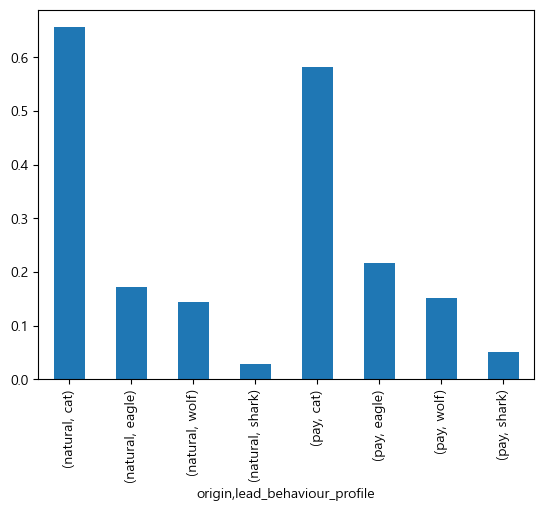

In [54]:
# 유입채널별 성향파악
mql_deals.groupby('origin')['lead_behaviour_profile'].value_counts(normalize=True).plot.bar()

### 유입경로에 따라서도 체결시간이 달라지는지

In [55]:
SQL = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL, rds_python_conn())

In [56]:
SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())

In [57]:
mql_deals = mql.merge(closed_deals, on='mql_id',how='left')

# 체결까지의 시간 컬럼 생성
mql_deals['time'] = (mql_deals['won_date']-mql_deals['first_contact_date']).dt.days
# 판매자별 행동이 2개이상인경우는 unknown으로 대체.
mql_deals.loc[mql_deals['lead_behaviour_profile'].str.split().str.len()>1,'lead_behaviour_profile']=np.nan
mql_deals.loc[mql_deals['lead_behaviour_profile'].str.contains('unknown',na=False),'lead_behaviour_profile']=np.nan
# cat, wolf면 stable, eagle, shark면 aggressive
# mql_deals.loc[mql_deals['lead_behaviour_profile'].str.contains('cat|wolf',na=False),'lead_behaviour_profile']='stable'
# mql_deals.loc[mql_deals['origin'].str.contains('paid_search|display|social|email|referral',na=False),'origin']='pay'
# mql_deals.loc[mql_deals['origin'].str.contains('organic_search|unknown|direct_traffic|other_publicities|other',na=False),'origin']='natural'

# 체결날짜보다 컨택날짜가 늦은경우는 삭제진행.
mql_deals = mql_deals.drop(index=6357).reset_index(False)

In [58]:
a=mql_deals[mql_deals.seller_id.notnull()].groupby('origin')['time'].mean().sort_values().reset_index()

fig = px.bar(a,x='origin', y='time', title='유입경로별 평균 체결시간')
fig.update_traces(marker_color=['black','#4A55A2','#4A55A2','black','#4A55A2','#4A55A2','#4A55A2','black','black','black'])
fig.update_layout(width=600)
fig.show()

# 블랙 : 유료
# 퍼플 : 무료
# mql_deals.loc[mql_deals['origin'].str.contains('organic_search|unknown|direct_traffic|other_publicities|other',na=False),'origin']='natural'

In [59]:
SQL = """
SELECT *
FROM order_items
;
"""
order_items = pd.read_sql(SQL, rds_python_conn())
order_items.seller_id.unique()

array([2622, 1942, 1180, ..., 1520,  531, 3541], dtype=int64)

In [60]:
SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())

SQL2 = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL2, rds_python_conn())

mql_close = mql.merge(closed_deals,on='mql_id',how='left')

mql_close['seller_ok'] = mql_close['seller_id'].isin(mql_deals[mql_deals['seller_id'].isin(order_items['seller_id'].unique())]['seller_id'])
mql_close


,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,seller_ok
0,5143,2018-02-01,490,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
1,5819,2017-10-20,247,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
2,1369,2018-03-22,95,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
3,312,2018-01-22,435,email,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
4,3690,2018-02-21,119,organic_search,2187.0,17.0,2.0,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2920,2018-05-22,300,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
7996,3895,2018-03-27,269,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
7997,7527,2017-08-27,119,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False
7998,639,2017-10-06,489,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False


In [63]:
filtered_mql_deals = mql_deals[mql_deals['seller_id'].isin(order_items['seller_id'].unique())]
filtered_mql_deals.head()

,index,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,time
4,4,3690,2018-02-21,119,organic_search,2187.0,17.0,2.0,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,5.0
14,14,1076,2018-04-03,417,organic_search,3397.0,0.0,9.0,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,63.0
67,67,1265,2017-10-09,432,unknown,3242.0,15.0,3.0,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,267.0
79,79,2407,2018-02-06,358,organic_search,3046.0,24.0,21.0,2018-02-07 18:04:05,health_beauty,online_medium,NaN,manufacturer,0.0,1.0
86,86,5147,2018-04-13,382,unknown,2829.0,26.0,2.0,2018-04-17 17:01:57,health_beauty,offline,cat,manufacturer,0.0,4.0


In [64]:
mql_close['time'] = (mql_close['won_date']-mql_close['first_contact_date']).dt.days
# # 판매자별 행동이 2개이상인경우는 unknown으로 대체.
mql_close.loc[mql_close['lead_behaviour_profile'].str.split().str.len()>1,'lead_behaviour_profile']=np.nan
mql_close.loc[mql_close['lead_behaviour_profile'].str.contains('unknown',na=False),'lead_behaviour_profile']=np.nan
# # cat, wolf면 stable, eagle, shark면 aggressive
# mql_close.loc[mql_close['origin'].str.contains('paid_search|display|social|email|referral',na=False),'origin']='pay'
# mql_close.loc[mql_close['origin'].str.contains('organic_search|unknown|direct_traffic|other_publicities|other',na=False),'origin']='natural'

In [65]:
mql_close = mql_close[mql_close.seller_id.notnull()]

In [66]:
mql_close[mql_close.seller_ok==True].groupby('lead_behaviour_profile')['seller_id'].count()/mql_close.groupby('lead_behaviour_profile')['seller_id'].count()

lead_behaviour_profile
cat      0.449631
eagle    0.406504
shark    0.416667
wolf     0.452632
Name: seller_id, dtype: float64

<Axes: xlabel='lead_type'>

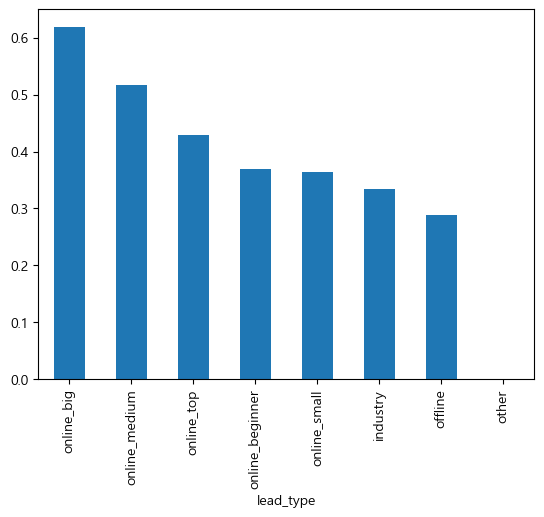

In [67]:
(mql_close[mql_close['seller_ok']==True].groupby('lead_type')['seller_id'].count()/mql_close.groupby('lead_type')['seller_id'].count()).sort_values(ascending=False).plot.bar()

### 오프라인과 온라인 판매자들의 예상 배송시간 차이

In [117]:
SQL = """
SELECT *
FROM mql
;
"""
mql = pd.read_sql(SQL, rds_python_conn())
mql
SQL = """
SELECT *
FROM closed_deals
;
"""
closed_deals = pd.read_sql(SQL, rds_python_conn())
mql_deals = mql.merge(closed_deals, on='mql_id',how='inner')
mql_deals.loc[mql_deals['origin'].str.contains('paid_search|display|social|email|referral',na=False),'origin']='pay'
mql_deals.loc[mql_deals['origin'].str.contains('organic_search',na=False),'origin']='natural'
mql_deals

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,3690,2018-02-21,119,natural,2187,17,2,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
1,6059,2018-04-04,39,pay,648,6,3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0
2,1076,2018-04-03,417,natural,3397,0,9,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0
3,221,2018-01-14,196,pay,1900,2,3,2018-01-17 13:51:03,food_drink,online_small,unknown,reseller,0.0
4,1265,2017-10-09,432,unknown,3242,15,3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,598,2018-03-28,95,natural,2629,22,17,2018-08-01 20:22:31,home_decor,offline,cat,reseller,0.0
838,1527,2018-05-18,382,natural,1235,27,13,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,reseller,200000.0
839,7113,2018-05-25,358,pay,3301,27,17,2018-06-06 20:15:26,computers,online_medium,wolf,reseller,0.0
840,5228,2018-02-04,490,pay,1289,19,3,2018-03-06 15:52:23,pet,online_beginner,cat,reseller,0.0


In [114]:
SQL = """
SELECT order_id, customer_id, DATE_PART('day', order_estimated_delivery_date - order_purchase_timestamp) AS days_difference
FROM "order"
WHERE order_status in ('delivered','shipped','invoiced','processing') and order_purchase_timestamp < '2018-09-01';
"""
order = pd.read_sql(SQL, rds_python_conn())
order

,order_id,customer_id,days_difference
0,13974,65773,15.0
1,83165,13301,19.0
2,66104,44559,26.0
3,64037,69256,26.0
4,14183,35294,12.0
...,...,...,...
98194,63791,92532,18.0
98195,85704,30689,23.0
98196,19817,23177,30.0
98197,6896,84231,37.0


In [123]:
SQL = """
SELECT *
FROM order_itmes
"""
order_itmes = pd.read_sql(SQL, rds_python_conn())
order_itmes

DatabaseError: Execution failed on sql '
SELECT *
FROM order_itmes
': relation "order_itmes" does not exist
LINE 3: FROM order_itmes
             ^
